# Instalación versión adeacuada de TensorFlow



In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


#Imports necesarios

In [ ]:
from psutil import virtual_memory
from google.colab import drive
from pathlib import Path
import os #lectura o escritura en el sistema de archivos.
import matplotlib.pyplot as plt #proporciona una interfaz similar a MATLAB para la creación de gráficos y figuras.
import numpy as np #fundamental para la computación científica en Python, proporcionando soporte para matrices y operaciones matemáticas de alto rendimiento.
import tensorflow as tf #TensorFlow es una biblioteca de código abierto para el aprendizaje automático,
from tensorflow import keras #Keras es una API de alto nivel para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import cv2
import json
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from keras.models import Model

#  Montaje del drive y organización de directorios



In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
rutaModelo=Path('/content/gdrive/MyDrive/ColabNotebooks/newplantvillage/best_model.h5')

print(rutaModelo)

#Enlace con el modelo diponible ya entrenado
#https://drive.google.com/drive/u/1/folders/1OGTUW4Eu-AbdAPuwV4dWpjI7_es9QYnl

/content/gdrive/MyDrive/ColabNotebooks/newplantvillage/best_model.h5


# Obetener clases para la predición

In [ ]:
rutaClases=Path('gdrive/My Drive/plantasIvan/newplantvillage')

print(rutaClases)

#Enlace disponible con las clases usadas
#https://drive.google.com/drive/folders/1hOImmBNjVnLyFUuxx65dqeo6ygJYnTjJ?usp=sharing

gdrive/My Drive/plantasIvan/newplantvillage


In [ ]:
# Filtrar y ordenar los subdirectorios
classes_train = sorted(list(filter(lambda x: os.path.isdir('/content/gdrive/MyDrive/plantasIvan/newplantvillage/' + x), os.listdir('/content/gdrive/MyDrive/plantasIvan/newplantvillage/'))))


In [ ]:
print(classes_train)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# Configurar nuestro propio modelo y usar el modelo preentrenado ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes_train), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])



# Cargar modelo ya entrenado (usar el de la ruta de Google Drive o el que entrenemos)

In [ ]:
try:
    model.load_weights(rutaModelo)
    print("Modelo cargado exitosamente")
except Exception as e:
    print(f"Error al cargar el modelo: {e}")


# Verificar la estructura del modelo
model.summary()

Error al cargar el modelo: Layer count mismatch when loading weights from file. Model expected 110 layers, found 5 saved layers.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256   

# Probar clasificación de imagenes

Crear una carpeta en el content llamada test_imgs y meter la imagen que deseamos aplicar el Grad-CAM

In [17]:
# Prueba del modelo con imágenes propias
# Listar todas las imágenes en el directorio de pruebas
test_images = [f for f in os.listdir('/content/test_imgs/') if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.JPG')  or f.endswith('.jpeg')]
dataset = np.ndarray(shape=(len(test_images), 200, 200, 3))

# Cargar y redimensionar las imágenes
for i, file_name in enumerate(test_images):
    try:
        img_path = os.path.join('/content/test_imgs/', file_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_resize = cv2.resize(img, (200, 200))
            dataset[i] = np.array(img_resize) / 255.0
        else:
            print(f"Error al cargar la imagen: {file_name}")
    except Exception as e:
        print(f"Error procesando la imagen {file_name}: {e}")

# Verificar las dimensiones del dataset
print("Shape del dataset:", dataset.shape)
print(f"Dimensiones de la imagen: {img_resize.shape}")

Shape del dataset: (1, 200, 200, 3)
Dimensiones de la imagen: (200, 200, 3)


1/1 [==============================] - 2s 2s/step


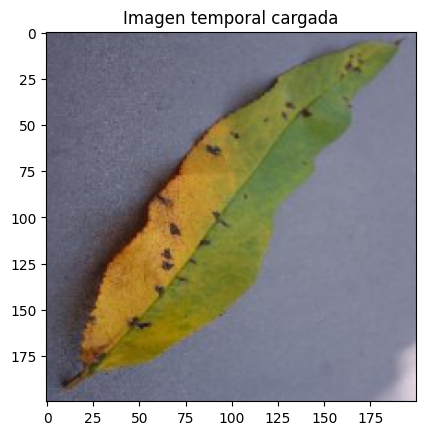

In [20]:


# Realizar predicciones utilizando el modelo
predictions = model.predict(dataset)
results = np.argmax(predictions, axis=-1)

# Verificar y mostrar la imagen temporal usando matplotlib (opcional)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.title("Imagen temporal cargada")
plt.show()

# Construcción del diccionario de resultados
final_json = {}
for file_name, result in zip(test_images, results):
    final_json[file_name] = classes_train[result]




# Grad-CAM


In [18]:
# Funciones para Grad-CAM
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Acceder a la capa específica dentro del submodelo
    base_model = model.layers[0]
    # Obtener la capa específica dentro del submodelo
    # Assuming 'model' is already the base model and not a nested model
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        [model.input],
        [last_conv_layer.output, model.output]
    )



    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = np.uint8(255 * heatmap)
    jet = plt.colormaps.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)


/content/test_imgs/00ddc106-692e-4c67-b2e8-569c924caf49___Rutg._Bact.S 1228.JPG


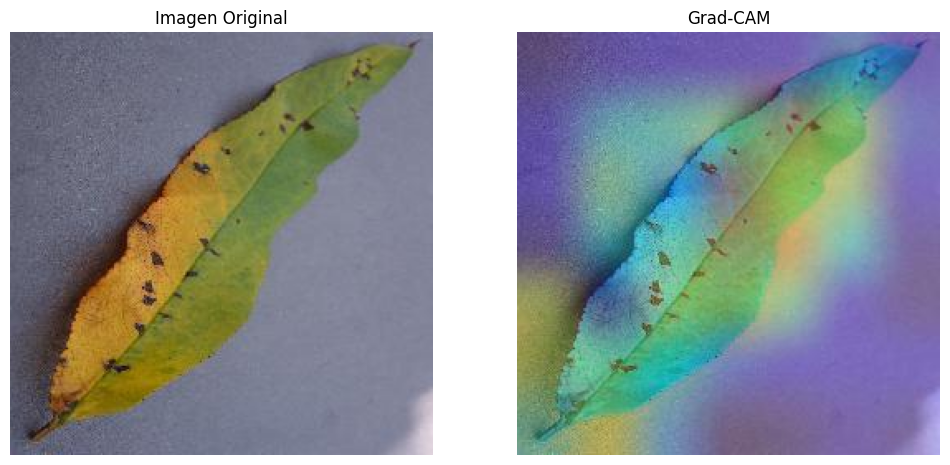

In [21]:
# Generar Grad-CAM para cada imagen de prueba
last_conv_layer_name = "conv5_block3_out"  # Ajusta según el nombre de la última capa convolucional de ResNet50

for i, file_name in enumerate(test_images):
    img_path = os.path.join('/content/test_imgs/', file_name)
    print(img_path)
    img_array = get_img_array(img_path, size=(200, 200))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=results[i])
    cam_path = os.path.join('/content/test_imgs/', f"cam_{file_name}")
    save_and_display_gradcam(img_path, heatmap, cam_path=cam_path)

    # Mostrar la imagen original y la imagen con Grad-CAM
    original_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    gradcam_img = cv2.cvtColor(cv2.imread(cam_path), cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_img)
    ax[0].set_title("Imagen Original")
    ax[0].axis('off')

    ax[1].imshow(gradcam_img)
    ax[1].set_title("Grad-CAM")
    ax[1].axis('off')

    plt.show()
